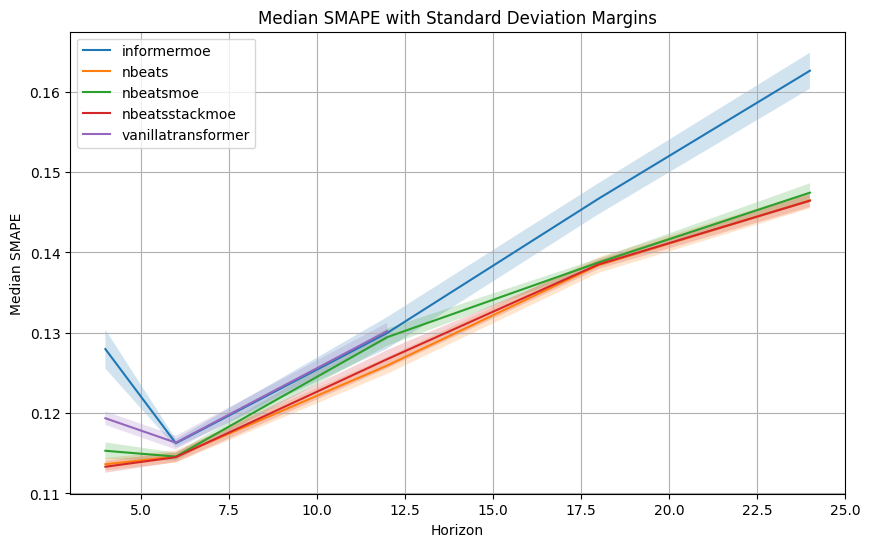

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("C:\\Users\\ricar\\mixture_of_experts_time_series\\results_summary.csv")

# Filter data for plotting
grouped_data = data.groupby("model_name")

# Plotting
plt.figure(figsize=(10, 6))

for model_name, group in grouped_data:
    horizons = group["horizon"]
    median_smape = group["median_smape"]
    std_dev_smape = group["std_dev_smape"]
    
    # Plot median SMAPE
    plt.plot(horizons, median_smape, label=model_name)
    
    # Plot standard deviation as shaded area
    plt.fill_between(
        horizons,
        median_smape - std_dev_smape,
        median_smape + std_dev_smape,
        alpha=0.2
    )

plt.title("Median SMAPE with Standard Deviation Margins")
plt.xlabel("Horizon")
plt.ylabel("Median SMAPE")
plt.legend()
plt.grid()
plt.show()